In [1]:
install.packages("viridis")
library("viridis")
install.packages("missMDA")
library("missMDA")
install.packages("factoextra")
library("factoextra")
install.packages("MASS")
library("MASS")
install.packages("ggplot2")
library("ggplot2")
install.packages("ggfortify")
library("ggfortify")

package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpUxHOBo\downloaded_packages


Warning message:
"package 'viridis' was built under R version 4.0.5"
Loading required package: viridisLite



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpUxHOBo\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 4.0.5"


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpUxHOBo\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R\library\00LOCK\MASS\libs\x64\MASS.dll to D:\R\library\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpUxHOBo\downloaded_packages


Warning message:
"package 'MASS' was built under R version 4.0.5"
Warning message:
"package 'ggplot2' is in use and will not be installed"


package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpUxHOBo\downloaded_packages


Warning message:
"package 'ggfortify' was built under R version 4.0.5"


In [2]:
Species <- read.csv("geneva_X_transformed_forPCA.csv",header = TRUE,colClasses =c(NA,"NULL",NA,"NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL") )

ionomics <- read.csv("geneva_X_transformed_forPCA.csv",header = TRUE,colClasses =c("NULL","NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA) )
ionomics <- imputePCA(ionomics)

In [3]:
Species <- cbind(Species, ionomics$completeObs)

In [4]:
ionsPCA <- prcomp(ionomics$completeObs,scale = FALSE)
ionsPCAvar <- princomp(ionomics$completeObs, cor = FALSE,score = TRUE)

In [5]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,3.111436388,24.59898474,24.59898
Dim.2,2.183835648,17.26538263,41.86437
Dim.3,1.521894981,12.03208638,53.89645
Dim.4,1.481218605,11.71049937,65.60695
Dim.5,1.037491934,8.20240077,73.80935
Dim.6,0.648947293,5.13057076,78.93992
Dim.7,0.573297336,4.53248296,83.47241
Dim.8,0.474306121,3.74985941,87.22227
Dim.9,0.384256402,3.03792725,90.26019


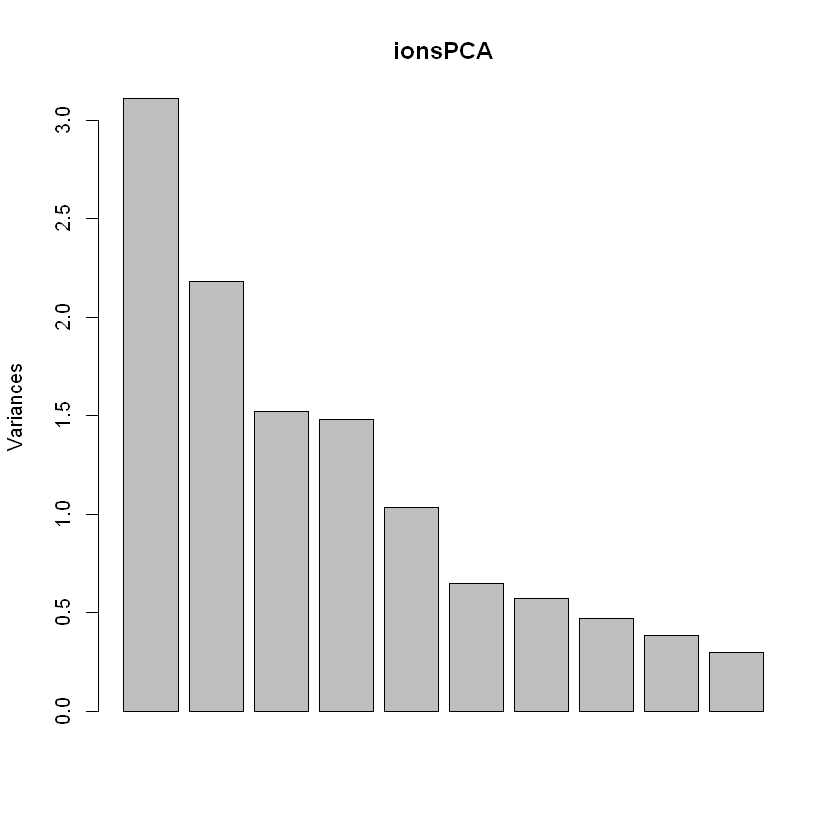

In [6]:
plot(ionsPCA)

In [7]:
summary(ionsPCAvar)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.7597415 1.4742746 1.2307243 1.2141658 1.01615693
Proportion of Variance 0.2459898 0.1726538 0.1203209 0.1171050 0.08202401
Cumulative Proportion  0.2459898 0.4186437 0.5389645 0.6560695 0.73809354
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.80366144 0.75536765 0.68706493 0.61841352 0.54727442
Proportion of Variance 0.05130571 0.04532483 0.03749859 0.03037927 0.02379193
Cumulative Proportion  0.78939925 0.83472408 0.87222267 0.90260194 0.92639388
                          Comp.11    Comp.12    Comp.13     Comp.14    Comp.15
Standard deviation     0.51897272 0.43179879 0.36697975 0.333946632 0.31500930
Proportion of Variance 0.02139481 0.01481093 0.01069803 0.008858773 0.00788254
Cumulative Proportion  0.94778869 0.96259962 0.97329764 0.982156413 0.99003895
                           Comp.16     Comp.17    

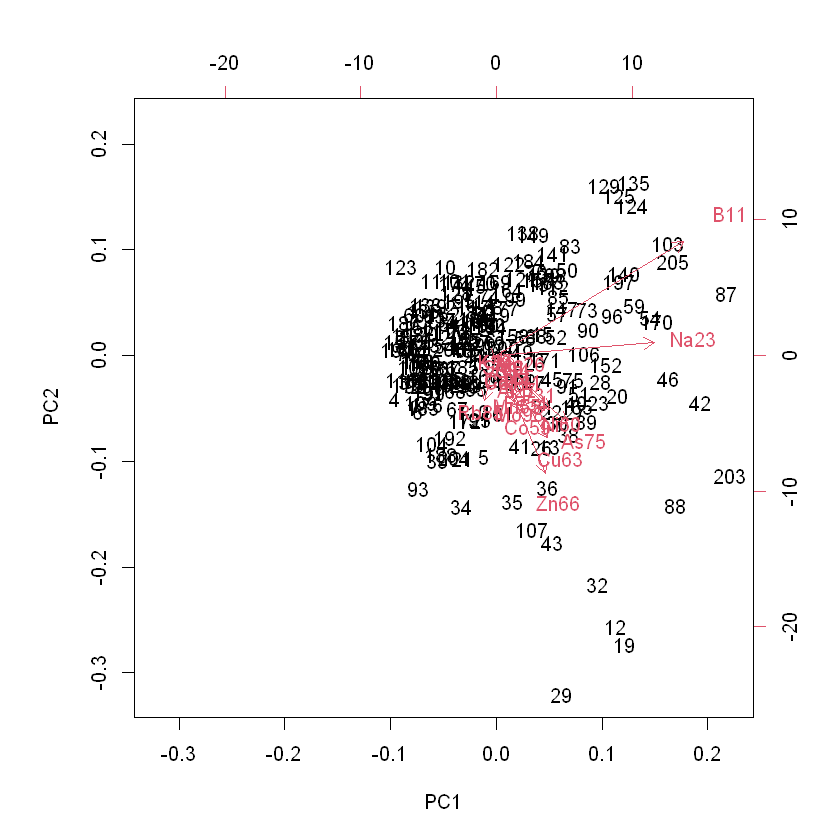

In [8]:
biplot(ionsPCA)

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

In [9]:
for (val in 1:nrow(Species)){
    if(Species[,2][val]==1){
        Species[,2][val]<-"V. acerifolia"
    }
    else if(Species[,2][val]==2){
        Species[,2][val]<-"V. aestivalis"
    }
    else if(Species[,2][val]==3){
        Species[,2][val]<-"V. cinerea"
    }
    else if(Species[,2][val]==4){
        Species[,2][val]<-"V. labrusca"
    }
    else if(Species[,2][val]==5){
        Species[,2][val]<-"V. palmata"
    }
    else if(Species[,2][val]==6){
        Species[,2][val]<-"V. riparia"
    }
    else if(Species[,2][val]==7){
        Species[,2][val]<-"V. rupestris"
    }    
    else if(Species[,2][val]==8){
        Species[,2][val]<-"V. vulpina"
    }
    else if(Species[,2][val]==0){
        Species[,2][val]<-"Hybrids and Unkowns"
    }
}

Saving 6.67 x 6.67 in image



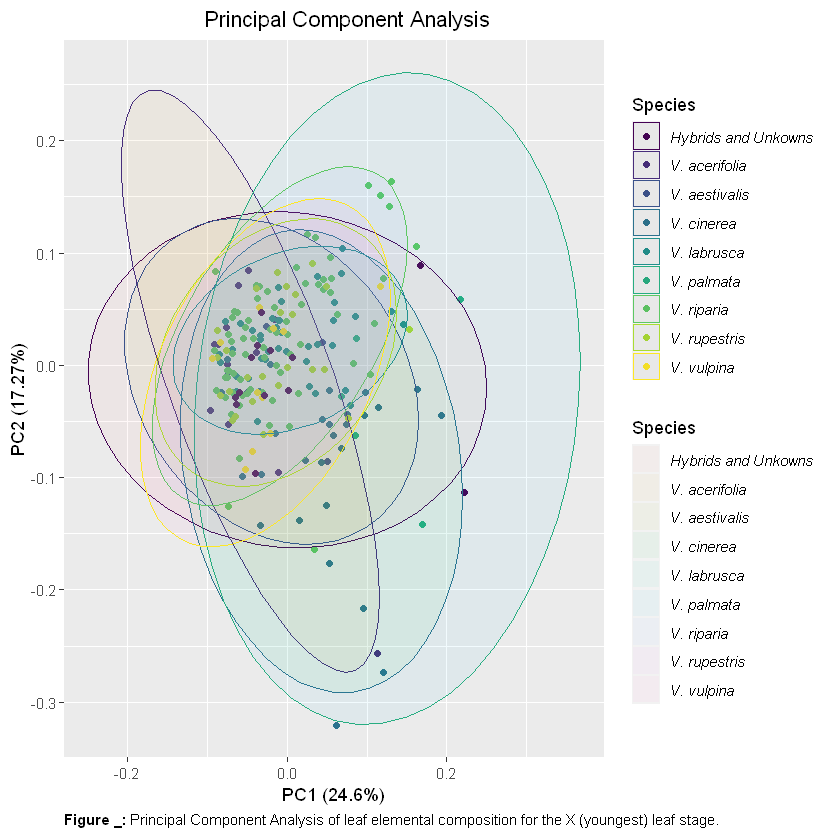

In [20]:
p <- autoplot(ionsPCA, data = Species, colour = 'spec_as_int', frame = TRUE, frame.type = 'norm', frame.alpha = .05) + scale_color_viridis_d("Species")
p <- p + labs(title = "Principal Component Analysis", caption = expression(paste(bold("Figure _: "),"Principal Component Analysis of leaf elemental composition for the X (youngest) leaf stage.")))
p <- p + theme(plot.title = element_text(hjust = .55), legend.text = element_text(face = "italic"), plot.caption = element_text(hjust = 0))
p <- p + scale_fill_discrete(name = "Species ")
p
ggsave(filename = "PCA_X_only.jpg", dpi = "retina")

In [13]:
pcaVars <- get_pca_var(ionsPCA)
pcaVars$contrib[,1]
pcaVars$contrib[,2]

B11       Na23       Mg26       Al27        P31        S34        K39 
 0.3395374  0.5752669 10.4347896  2.6222812  0.6694129  5.9418585  6.6565563 
      Ca44       Fe54       Mn55       Co59       Ni60       Cu63       Zn66 
13.0148587  9.2432638 13.3698950 11.5589690  0.8808218  0.0442374  3.8373539 
      As75       Rb85       Sr88       Mo98      Cd111 
 2.1420665  4.5532134 11.8491410  1.6871944  0.5792823

B11        Na23        Mg26        Al27         P31         S34 
 2.98102067 11.52580642  0.21016868  5.91737038 14.61675837  2.44849519 
        K39        Ca44        Fe54        Mn55        Co59        Ni60 
 8.21440204  1.41135051  1.04970142  0.28632641  2.04875693  8.50981570 
       Cu63        Zn66        As75        Rb85        Sr88        Mo98 
15.66333049  7.17263962  3.81265002  7.82886423  1.92080144  4.30030615 
      Cd111 
 0.08143533

In [14]:
cor()

ERROR: Error in is.data.frame(x): argument "x" is missing, with no default


In [15]:
cov(Species)

ERROR: Error in cov(Species): is.numeric(x) || is.logical(x) is not TRUE
